In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier


from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.metrics import ConfusionMatrixDisplay 

from sklearn.model_selection import GridSearchCV

import pickle

from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

### Обработка и исследование данных

In [2]:
df = pd.read_csv('../data/diabetes_binary_5050split_health_indicators_BRFSS2015.csv')

In [3]:
df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0


Проверка на пропуски в данных (пропусков нет)

In [4]:
df.isna().sum()

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_binary       70692 non-null  float64
 1   HighBP                70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   Stroke                70692 non-null  float64
 7   HeartDiseaseorAttack  70692 non-null  float64
 8   PhysActivity          70692 non-null  float64
 9   Fruits                70692 non-null  float64
 10  Veggies               70692 non-null  float64
 11  HvyAlcoholConsump     70692 non-null  float64
 12  AnyHealthcare         70692 non-null  float64
 13  NoDocbcCost           70692 non-null  float64
 14  GenHlth               70692 non-null  float64
 15  MentHlth           

In [6]:
for col in df.columns:
    df[col] = df[col].astype(int)

Распределение классов равномерное

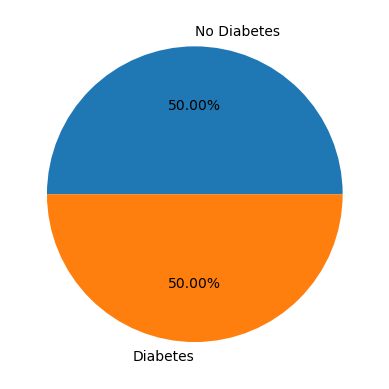

In [7]:
plt.pie(df['Diabetes_binary'].value_counts(), labels=['No Diabetes', 'Diabetes'], autopct='%1.2f%%')
plt.show()

Распределение признаков

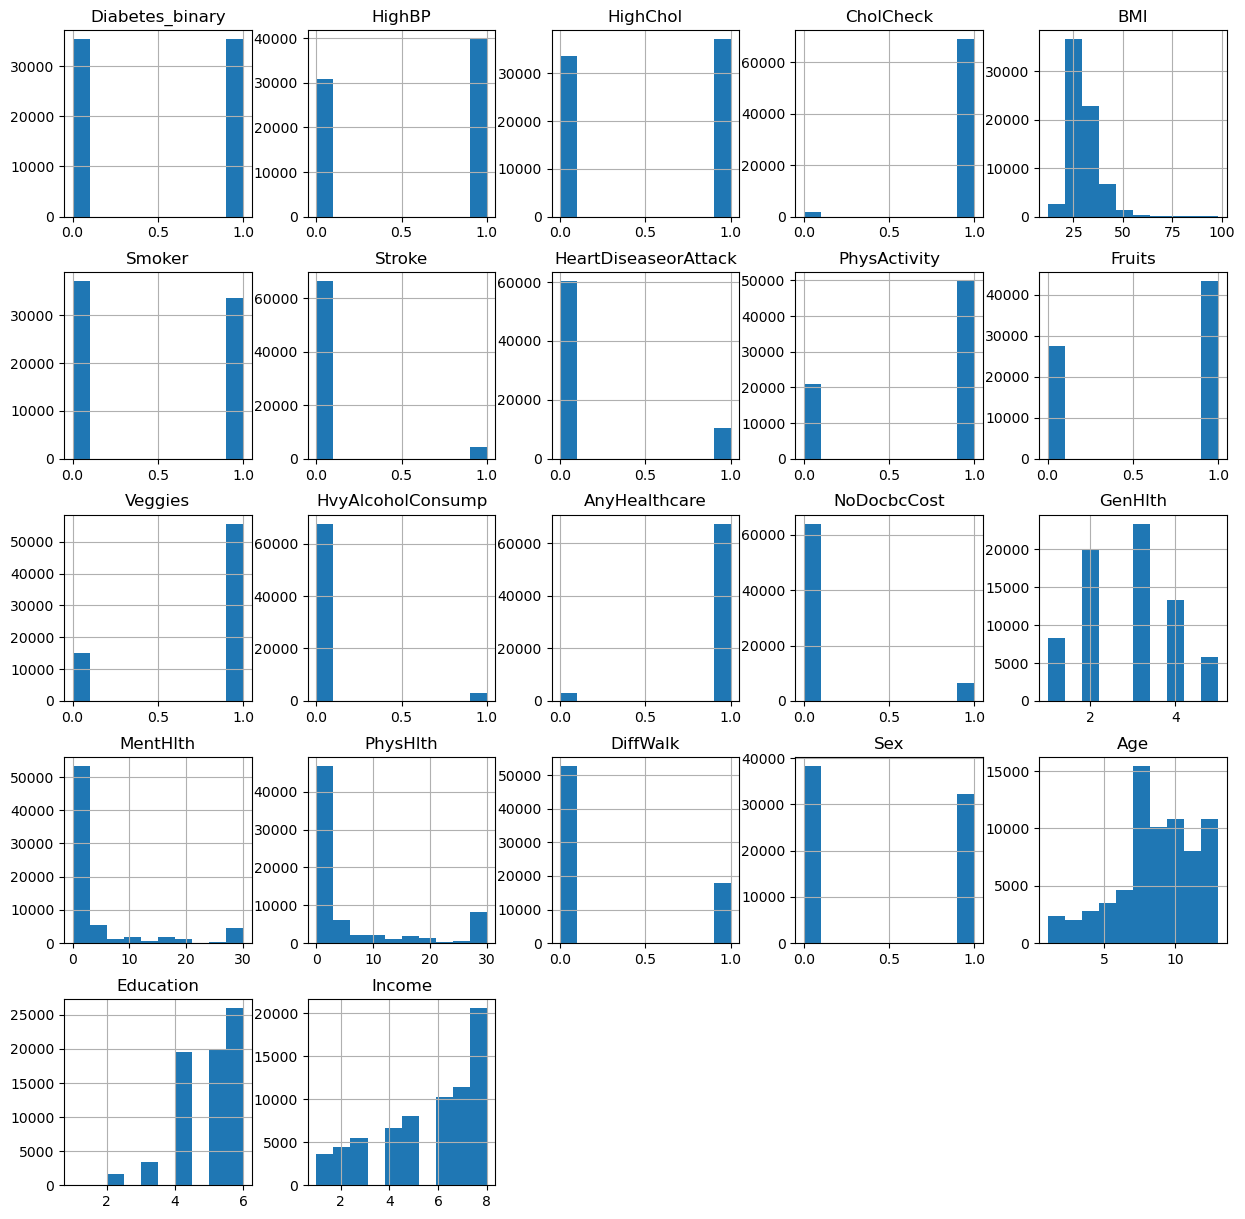

In [8]:
df.hist(figsize=(15,15))
plt.show()

Корреляция признаков

In [9]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
Diabetes_binary,1.000000,0.381516,0.289213,0.115382,0.293373,0.085999,0.125427,0.211523,-0.158666,-0.054077,-0.079293,-0.094853,0.023191,0.040977,0.407612,0.087029,0.213081,0.272646,0.044413,0.278738,-0.170481,-0.224449
HighBP,0.381516,1.000000,0.316515,0.103283,0.241019,0.087438,0.129060,0.210750,-0.136102,-0.040852,-0.066624,-0.027030,0.035764,0.026517,0.320540,0.064294,0.173922,0.234784,0.040819,0.338132,-0.141643,-0.187657
HighChol,0.289213,0.316515,1.000000,0.085981,0.131309,0.093398,0.099786,0.181187,-0.090453,-0.047384,-0.042836,-0.025443,0.031532,0.033199,0.237778,0.083881,0.142610,0.162043,0.017324,0.240338,-0.084386,-0.107777
CholCheck,0.115382,0.103283,0.085981,1.000000,0.045648,-0.004331,0.022529,0.043497,-0.008249,0.017384,0.000349,-0.027146,0.106800,-0.062669,0.059213,-0.010660,0.034540,0.044430,-0.007991,0.101743,-0.008695,0.007550
BMI,0.293373,0.241019,0.131309,0.045648,1.000000,0.011551,0.022931,0.060355,-0.170936,-0.084505,-0.056528,-0.058232,-0.013417,0.065832,0.267888,0.104682,0.161862,0.246094,0.000827,-0.038648,-0.100233,-0.124878
Smoker,0.085999,0.087438,0.093398,-0.004331,0.011551,1.000000,0.064658,0.124418,-0.079823,-0.074811,-0.029926,0.077835,-0.012939,0.035799,0.152416,0.091257,0.120698,0.119789,0.112125,0.105424,-0.140966,-0.104725
Stroke,0.125427,0.129060,0.099786,0.022529,0.022931,0.064658,1.000000,0.223394,-0.079985,-0.008996,-0.047601,-0.023395,0.006484,0.036198,0.189447,0.087303,0.164488,0.192266,0.003822,0.123879,-0.073926,-0.136577
HeartDiseaseorAttack,0.211523,0.210750,0.181187,0.043497,0.060355,0.124418,0.223394,1.000000,-0.098223,-0.019436,-0.036315,-0.037130,0.015687,0.036029,0.275868,0.075057,0.198416,0.232611,0.098161,0.221878,-0.096559,-0.146748
PhysActivity,-0.158666,-0.136102,-0.090453,-0.008249,-0.170936,-0.079823,-0.079985,-0.098223,1.000000,0.133813,0.149322,0.019111,0.027089,-0.063302,-0.273548,-0.130090,-0.234500,-0.276868,0.051753,-0.100753,0.190271,0.196551
Fruits,-0.054077,-0.040852,-0.047384,0.017384,-0.084505,-0.074811,-0.008996,-0.019436,0.133813,1.000000,0.238605,-0.033246,0.029385,-0.045843,-0.098687,-0.062102,-0.048572,-0.050784,-0.088723,0.061096,0.098715,0.079009


Корреляция с предсказываемым признаком наличия диабета

<Axes: >

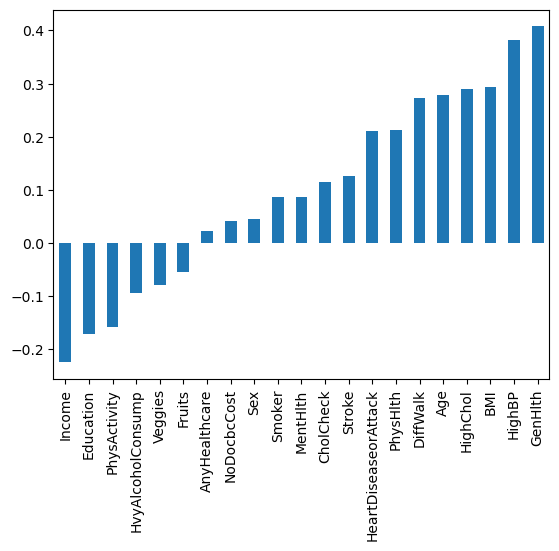

In [10]:
df.corr()['Diabetes_binary'][1:].sort_values().plot(kind='bar')

## Эксперименты с различными моделями классификации

Делим данные на train и test с сохранением пропорции классов

In [11]:
x = df.drop('Diabetes_binary', axis=1)
y = df['Diabetes_binary']
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=0, stratify=y)

In [12]:
print("train:", y_train.sum()/len(y_train))
print("test:", y_test.sum()/len(y_test))

train: 0.5000088412639471
test: 0.49996463682014286


In [13]:
scores = {}

### Логистическая регрессия

In [14]:
params = {'max_iter': [100, 300, 500, 700]}

In [15]:
search = GridSearchCV(LogisticRegression(), params,  n_jobs=-1)
search.fit(x_train, y_train)
y_pred = search.predict(x_test)
y_probs_lr = search.predict_proba(x_test)[:,1]

c:\Users\dasha\miniconda3\envs\classical-ml\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [16]:
search.best_params_

{'max_iter': 300}

In [17]:
scores['LogisticRegression'] = {'accuracy': accuracy_score(y_pred=y_pred, y_true=y_test), 'precision': precision_score(y_pred=y_pred, y_true=y_test), 
                                'recall': recall_score(y_pred=y_pred, y_true=y_test), 'f1': f1_score(y_pred=y_pred, y_true=y_test),
                                'roc_auc' : roc_auc_score(y_true=y_test, y_score=y_probs_lr)}

In [18]:
scores['LogisticRegression']

{'accuracy': 0.7483556121366434,
 'precision': 0.7425728893187785,
 'recall': 0.7602206818503324,
 'f1': 0.7512931637075353,
 'roc_auc': 0.82863869839887}

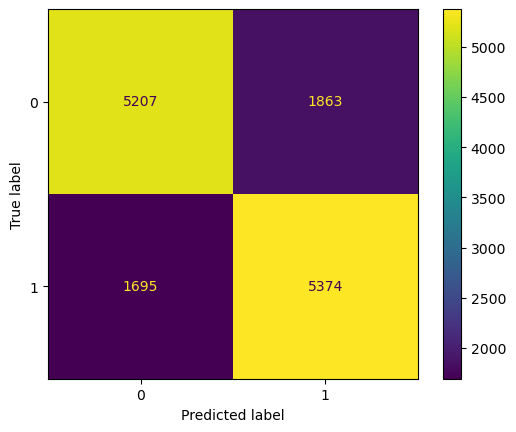

In [19]:
df_confusion = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=df_confusion, display_labels=search.classes_)
disp.plot()

#### Важность признаков

In [20]:
model = LogisticRegression(max_iter=300)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
importance = model.coef_[0]

c:\Users\dasha\miniconda3\envs\classical-ml\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


HighBP 0.7337903213542109
HighChol 0.6063302857156733
CholCheck 1.308113633523459
BMI 0.07420585481319154
Smoker -0.021453744311862585
Stroke 0.13101229891662697
HeartDiseaseorAttack 0.2508245757153465
PhysActivity -0.02032343455462948
Fruits -0.034082272983151175
Veggies -0.040214267928147425
HvyAlcoholConsump -0.7000722255518381
AnyHealthcare 0.02833049119842358
NoDocbcCost 0.021480524286935303
GenHlth 0.5798926956627086
MentHlth -0.0037538706914042913
PhysHlth -0.008442782907165127
DiffWalk 0.12714955065306516
Sex 0.26978015470376315
Age 0.15114312505677843
Education -0.0391075065751503
Income -0.05915654810017026


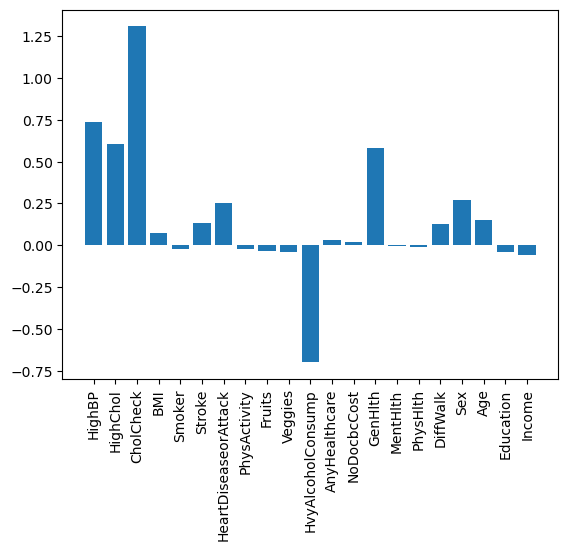

In [21]:
features = x_train.columns
for i, score in enumerate(importance):
 print(features[i], score)
plt.bar([f for f in features], importance)
plt.xticks(rotation=90)
plt.show()

### kNN

In [22]:
params = {'n_neighbors': range(3, 10)}

In [23]:
search = GridSearchCV(KNeighborsClassifier(), params,  n_jobs=-1)
search.fit(x_train, y_train)
y_pred = search.predict(x_test)
y_probs_knn = search.predict_proba(x_test)[:,1]

In [24]:
search.best_params_

{'n_neighbors': 9}

In [25]:
scores['KNeighborsClassifier'] = {'accuracy': accuracy_score(y_pred=y_pred, y_true=y_test), 'precision': precision_score(y_pred=y_pred, y_true=y_test), 
                                'recall': recall_score(y_pred=y_pred, y_true=y_test), 'f1': f1_score(y_pred=y_pred, y_true=y_test),
                                'roc_auc' : roc_auc_score(y_true=y_test, y_score=y_probs_knn)}

In [26]:
scores['KNeighborsClassifier']

{'accuracy': 0.7197821628120801,
 'precision': 0.7073821919636898,
 'recall': 0.7496109775074268,
 'f1': 0.7278846153846155,
 'roc_auc': 0.7833123907140426}

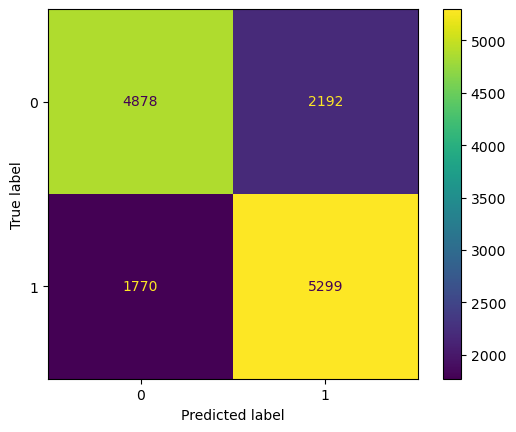

In [27]:
df_confusion = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=df_confusion, display_labels=search.classes_)
disp.plot()

### НБК

In [28]:
params = {'alpha': [1, 0.1, 0.01, 0.001, 0.0001]}

In [29]:
search = GridSearchCV(MultinomialNB(), params,  n_jobs=-1)
search.fit(x_train, y_train)
y_pred = search.predict(x_test)
y_probs_nb = search.predict_proba(x_test)[:,1]

In [30]:
search.best_params_

{'alpha': 0.1}

In [31]:
scores['НБК'] = {'accuracy': accuracy_score(y_pred=y_pred, y_true=y_test), 'precision': precision_score(y_pred=y_pred, y_true=y_test), 
                 'recall': recall_score(y_pred=y_pred, y_true=y_test), 'f1': f1_score(y_pred=y_pred, y_true=y_test),
                 'roc_auc' : roc_auc_score(y_true=y_test, y_score=y_probs_nb)}

In [32]:
scores['НБК']

{'accuracy': 0.6083174199023976,
 'precision': 0.6819586403613026,
 'recall': 0.40585655679728394,
 'f1': 0.5088683930471799,
 'roc_auc': 0.6968938727431744}

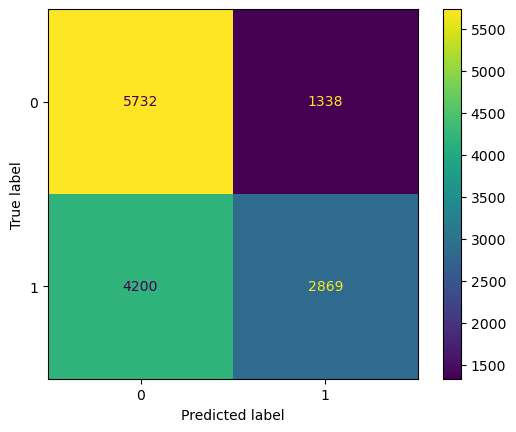

In [33]:
df_confusion = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=df_confusion, display_labels=search.classes_)
disp.plot()

### SVM

SVC_linear {'accuracy': 0.7485677912157861, 'precision': 0.7325304393859184, 'recall': 0.7829961805064366, 'f1': 0.7569230769230769, 'roc_auc': 0.8279135268578087}
SVC_poly {'accuracy': 0.7511139401654997, 'precision': 0.7484602463605823, 'recall': 0.7564011882868864, 'f1': 0.7524097657074509, 'roc_auc': 0.8301668159661995}
SVC_rbf {'accuracy': 0.751467571964071, 'precision': 0.7280307889672867, 'recall': 0.8028009619465271, 'f1': 0.7635898815931107, 'roc_auc': 0.8279731432917355}


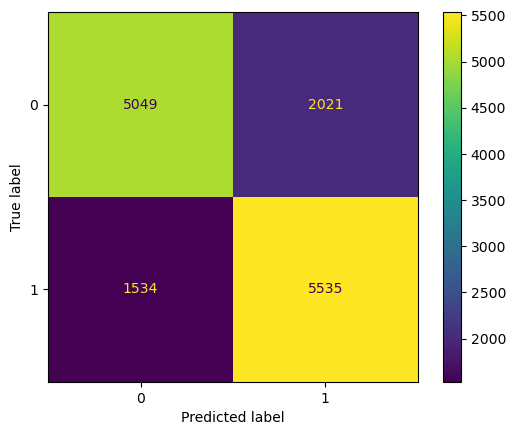

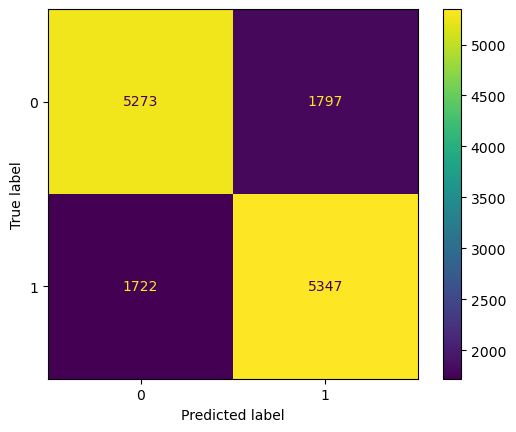

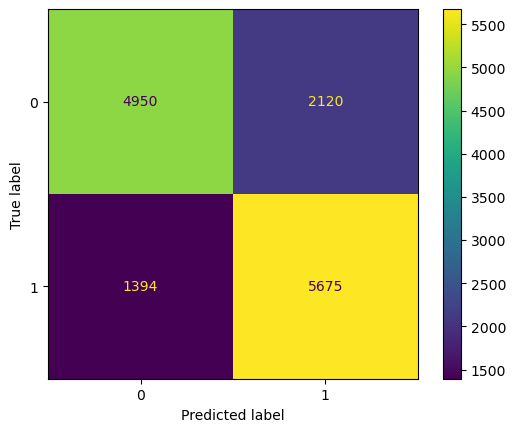

In [34]:
y_probs_svm_all = {}
for kernel in ['linear', 'poly', 'rbf']:
    model = SVC(kernel=kernel, probability=True)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    y_probs_svm = model.predict_proba(x_test)[:,1]
    y_probs_svm_all[kernel] = y_probs_svm

    scores['SVC_' + kernel] = {'accuracy': accuracy_score(y_true=y_test.values, y_pred=y_pred), 'precision': precision_score(y_true=y_test.values, y_pred=y_pred), 
                                'recall': recall_score(y_true=y_test.values, y_pred=y_pred), 'f1': f1_score(y_true=y_test.values, y_pred=y_pred),
                                'roc_auc' : roc_auc_score(y_true=y_test, y_score=y_probs_svm)}
    print('SVC_' + kernel, scores['SVC_' + kernel])
    df_confusion = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=df_confusion, display_labels=search.classes_)
    disp.plot()

### Deсision Tree

In [35]:
params = {'max_depth': [1, 3, 5, 10],
          'max_features' : [None, 'sqrt', 'log2'],
          'criterion' : ['gini', 'entropy', 'log_loss']}

In [36]:
search = GridSearchCV(DecisionTreeClassifier(), params,  n_jobs=-1)
search.fit(x_train, y_train)
y_pred = search.predict(x_test)
y_probs_dt = search.predict_proba(x_test)[:,1]

In [37]:
search.best_params_

{'criterion': 'log_loss', 'max_depth': 10, 'max_features': None}

In [38]:
scores['DecisionTreeClassifier'] = {'accuracy': accuracy_score(y_pred=y_pred, y_true=y_test), 'precision': precision_score(y_pred=y_pred, y_true=y_test), 
                 'recall': recall_score(y_pred=y_pred, y_true=y_test), 'f1': f1_score(y_pred=y_pred, y_true=y_test),
                 'roc_auc' : roc_auc_score(y_true=y_test, y_score=y_probs_dt)}

In [39]:
scores['DecisionTreeClassifier']

{'accuracy': 0.7377466581795035,
 'precision': 0.7288574152253847,
 'recall': 0.7571085019097468,
 'f1': 0.7427144046627809,
 'roc_auc': 0.8092905794429249}

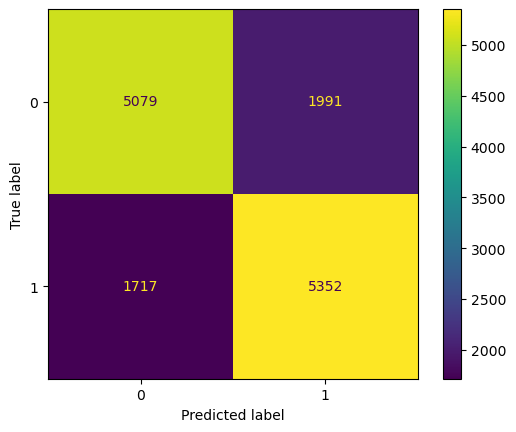

In [40]:
df_confusion = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=df_confusion, display_labels=search.classes_)
disp.plot()

### RandomForest

In [41]:
params = {'max_depth': [1, 3, 5, 10],
          'n_estimators': [5, 100, 500]}

In [42]:
search = GridSearchCV(RandomForestClassifier(), params,  n_jobs=-1)
search.fit(x_train, y_train)
y_pred = search.predict(x_test)
y_probs_rf = search.predict_proba(x_test)[:,1]	

In [43]:
search.best_params_

{'max_depth': 10, 'n_estimators': 100}

In [44]:
scores['RandomForestClassifier'] = {'accuracy': accuracy_score(y_pred=y_pred, y_true=y_test), 'precision': precision_score(y_pred=y_pred, y_true=y_test), 
                 'recall': recall_score(y_pred=y_pred, y_true=y_test), 'f1': f1_score(y_pred=y_pred, y_true=y_test),
                 'roc_auc' : roc_auc_score(y_true=y_test, y_score=y_probs_rf)}

In [45]:
scores['RandomForestClassifier']

{'accuracy': 0.7516797510432138,
 'precision': 0.7363805474355567,
 'recall': 0.7839864195784411,
 'f1': 0.7594381637547105,
 'roc_auc': 0.830081378083042}

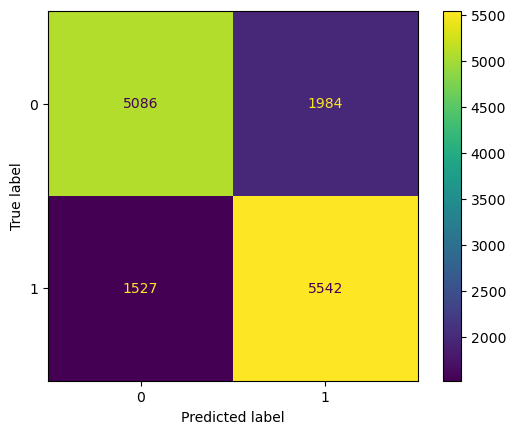

In [46]:
df_confusion = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=df_confusion, display_labels=search.classes_)
disp.plot()

### XGBoost

In [47]:
params = {'max_depth': range (2, 10, 2),
          'learning_rate': [0.01, 0.05, 0.1],
          'n_estimators': range(60, 220, 40)}

In [48]:
search = GridSearchCV(XGBClassifier(), params,  n_jobs=-1)
search.fit(x_train, y_train)
y_pred = search.predict(x_test)
y_probs_xgboost = search.predict_proba(x_test)[:,1]

In [49]:
search.best_params_

{'learning_rate': 0.05, 'max_depth': 4, 'n_estimators': 180}

In [50]:
scores['XGBClassifier'] = {'accuracy': accuracy_score(y_pred=y_pred, y_true=y_test), 'precision': precision_score(y_pred=y_pred, y_true=y_test), 
                 'recall': recall_score(y_pred=y_pred, y_true=y_test), 'f1': f1_score(y_pred=y_pred, y_true=y_test),
                 'roc_auc' : roc_auc_score(y_true=y_test, y_score=y_probs_xgboost)}

In [51]:
scores['XGBClassifier']

{'accuracy': 0.7542258999929273,
 'precision': 0.7370712401055409,
 'recall': 0.7903522421841844,
 'f1': 0.7627824424875418,
 'roc_auc': 0.8339353169195222}

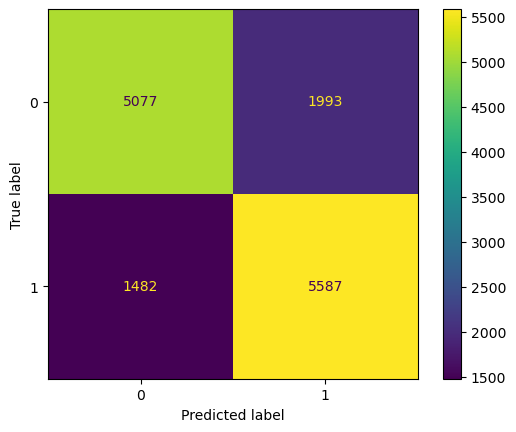

In [52]:
df_confusion = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=df_confusion, display_labels=search.classes_)
disp.plot()

### Catboost

In [53]:
params = {'depth': [4, 7, 10],
          'learning_rate': [0.01, 0.05, 0.1],
          'iterations': [10, 50, 100],
          }

In [54]:
search = GridSearchCV(CatBoostClassifier(verbose=0), params,  n_jobs=-1)
search.fit(x_train, y_train)
y_pred = search.predict(x_test)
y_probs_catboost = search.predict_proba(x_test)[:,1]	

In [55]:
search.best_params_

{'depth': 7, 'iterations': 100, 'learning_rate': 0.1}

In [56]:
scores['CatBoostClassifier'] = {'accuracy': accuracy_score(y_pred=y_pred, y_true=y_test), 'precision': precision_score(y_pred=y_pred, y_true=y_test), 
                 'recall': recall_score(y_pred=y_pred, y_true=y_test), 'f1': f1_score(y_pred=y_pred, y_true=y_test),
                 'roc_auc' : roc_auc_score(y_true=y_test, y_score=y_probs_catboost)}

In [57]:
scores['CatBoostClassifier']

{'accuracy': 0.7547209845109272,
 'precision': 0.7366898908899697,
 'recall': 0.7927571085019097,
 'f1': 0.7636958299264103,
 'roc_auc': 0.834246745006736}

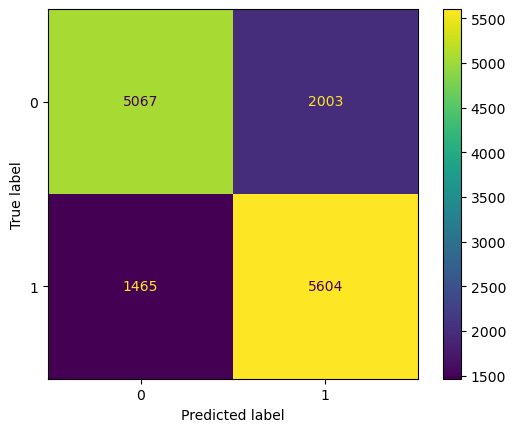

In [58]:
df_confusion = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=df_confusion, display_labels=search.classes_)
disp.plot()

### LGBM

In [59]:
params = {'num_leaves': range (2, 10, 2),
          'learning_rate': [0.01, 0.05, 0.1],
          'n_estimators': range(60, 220, 40)}

In [60]:
search = GridSearchCV(LGBMClassifier(), params,  n_jobs=-1)
search.fit(x_train, y_train)
y_pred = search.predict(x_test)
y_probs_lgbm = search.predict_proba(x_test)[:,1]

[LightGBM] [Info] Number of positive: 28277, number of negative: 28276
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002135 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 199
[LightGBM] [Info] Number of data points in the train set: 56553, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500009 -> initscore=0.000035
[LightGBM] [Info] Start training from score 0.000035


In [61]:
search.best_params_

{'learning_rate': 0.1, 'n_estimators': 180, 'num_leaves': 8}

In [62]:
scores['LGBMClassifier'] = {'accuracy': accuracy_score(y_pred=y_pred, y_true=y_test), 'precision': precision_score(y_pred=y_pred, y_true=y_test), 
                 'recall': recall_score(y_pred=y_pred, y_true=y_test), 'f1': f1_score(y_pred=y_pred, y_true=y_test),
                 'roc_auc' : roc_auc_score(y_true=y_test, y_score=y_probs_lgbm)}

In [63]:
scores['LGBMClassifier']

{'accuracy': 0.7545795317914987,
 'precision': 0.7369321922317315,
 'recall': 0.7917668694299053,
 'f1': 0.7633660665575559,
 'roc_auc': 0.8339199200925691}

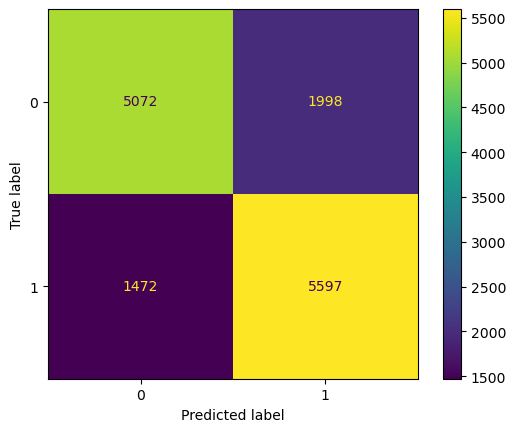

In [64]:
df_confusion = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=df_confusion, display_labels=search.classes_)
disp.plot()

## Результаты

In [65]:
score_df = pd.DataFrame(scores.values(), index=scores.keys())
score_df

,accuracy,precision,recall,f1,roc_auc
LogisticRegression,0.748356,0.742573,0.760221,0.751293,0.828639
KNeighborsClassifier,0.719782,0.707382,0.749611,0.727885,0.783312
НБК,0.608317,0.681959,0.405857,0.508868,0.696894
SVC_linear,0.748568,0.732530,0.782996,0.756923,0.827914
SVC_poly,0.751114,0.748460,0.756401,0.752410,0.830167
SVC_rbf,0.751468,0.728031,0.802801,0.763590,0.827973
DecisionTreeClassifier,0.737747,0.728857,0.757109,0.742714,0.809291
RandomForestClassifier,0.751680,0.736381,0.783986,0.759438,0.830081
XGBClassifier,0.754226,0.737071,0.790352,0.762782,0.833935
CatBoostClassifier,0.754721,0.736690,0.792757,0.763696,0.834247


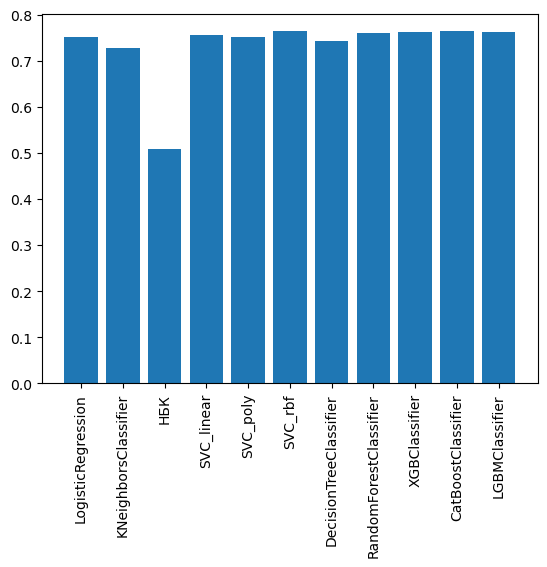

In [66]:
plt.bar(scores.keys(), score_df['f1'])
plt.xticks(rotation=90)
plt.show()

In [67]:
def roc_auc_plot(y_test, y_probs, label):
    fpr, tpr, treshold = roc_curve(y_test, y_probs)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr,
            label=label + ' (area = %0.4f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc="lower right")

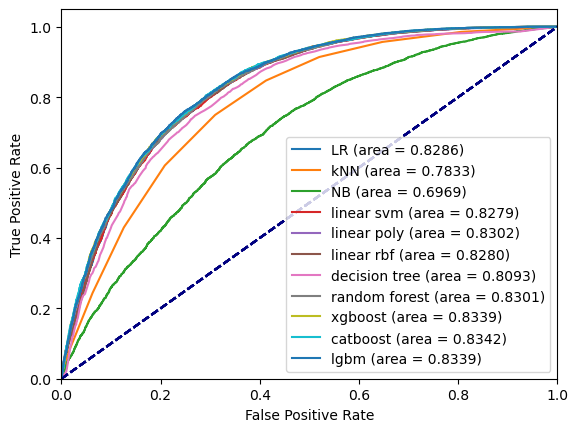

In [68]:
roc_auc_plot(y_test, y_probs_lr, 'LR')
roc_auc_plot(y_test, y_probs_knn, 'kNN')
roc_auc_plot(y_test, y_probs_nb, 'NB')
roc_auc_plot(y_test, y_probs_svm_all['linear'], 'linear svm')
roc_auc_plot(y_test, y_probs_svm_all['poly'], 'linear poly')
roc_auc_plot(y_test, y_probs_svm_all['rbf'], 'linear rbf')
roc_auc_plot(y_test, y_probs_dt, 'decision tree')
roc_auc_plot(y_test, y_probs_rf, 'random forest')
roc_auc_plot(y_test, y_probs_xgboost, 'xgboost')
roc_auc_plot(y_test, y_probs_catboost, 'catboost')
roc_auc_plot(y_test, y_probs_lgbm, 'lgbm')
plt.show()

Основная метрика - F1, так как это среднее гармоническое между precision и recall, соответственно она учитывает обе эти метрики

Лучшая модель по F1 метрике - CatBoostClassifier

Худшая модель - наивный байесовский классификатор, так как данный алгоритм делает предположение, что признаки независимы, что в данном случае не является правдой


### Эксперименты с важностью классов и ошибок 1 / 2 рода

Предположим, нам более важно уменьшить ошибку 2 рода (то есть уменьшить False Negative - пациенты, которым ошибочно предсказали отсутствия заболевания). Пусть 1 класс (то есть наличие болезни) в 2 раза важнее, чем 0 класс. Обучим модель с учетом этого условия

In [69]:
model = CatBoostClassifier(depth=7, iterations=100, learning_rate=0.1, class_weights={1 : 2, 0 : 1}, verbose=0)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

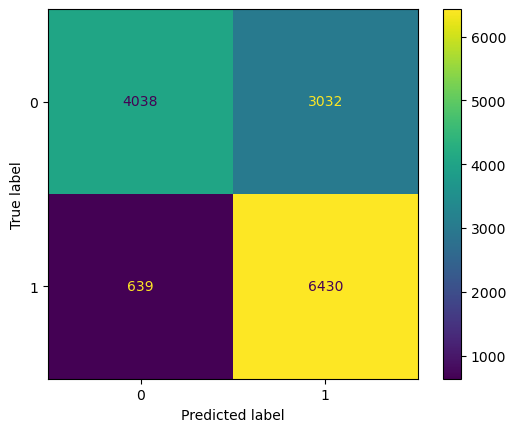

In [70]:
df_confusion = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=df_confusion, display_labels=search.classes_)
disp.plot()

In [71]:
print(recall_score(y_pred=y_pred, y_true=y_test))
print(precision_score(y_pred=y_pred, y_true=y_test))

0.9096053189984439
0.679560346649757


В данном случае вместо стандартной метрики f1 (для которой классы равнозначны), воспользуемся метрикой fbeta_score с параметром beta = 2, что значит, что recall в 2 раза важнее, чем precision

In [72]:
from sklearn.metrics import fbeta_score
print(fbeta_score(y_pred=y_pred, y_true=y_test, beta=2))

0.8519264401929089


Сохраним лучшую модель для использования ее в телеграм боте

In [73]:
model = CatBoostClassifier(depth=7, iterations=100, learning_rate=0.1, verbose=0)
model.fit(x_train, y_train)

In [74]:
with open('model_diabetes.pkl', 'wb') as file:
  pickle.dump(model, file)